In [ ]:
import pandas as pd

df = pd.read_csv("/content/final.csv")
df.dropna(inplace=True)
df

,Unnamed: 0,Art,Movement,artist,Year,nationality,StyleClassLabel,genre
0,0,pine-trees-in-the-fen-1884,Realism,Vincent_van_Gogh,1884.0,Dutch,Realism,landscape
2,2,peasant-woman-with-shawl-over-her-head-seen-fr...,Realism,Vincent_van_Gogh,1885.0,Dutch,Realism,sketch_and_study
4,4,portrait-of-a-woman-1885,Realism,Vincent_van_Gogh,1885.0,Dutch,Realism,portrait
5,5,peasant-woman-with-shawl-over-her-head-seen-fr...,Realism,Vincent_van_Gogh,1885.0,Dutch,Realism,sketch_and_study
8,8,the-house-of-pere-pilon-1890,Post_Impressionism,Vincent_van_Gogh,1890.0,Dutch,Post_Impressionism,landscape
...,...,...,...,...,...,...,...,...
13114,75387,the-pine-trees-of-louveciennes-1870,Impressionism,Camille_Pissarro,1870.0,French,Impressionism,landscape
13115,75388,paysanne-couchant-1882,Pointillism,Camille_Pissarro,1882.0,French,Pointillism,genre_painting
13117,75390,view-through-a-window-eragny-1888,Pointillism,Camille_Pissarro,1888.0,French,Pointillism,landscape
13120,75441,landscape-at-louveciennes-1870,Impressionism,Camille_Pissarro,1870.0,French,Impressionism,landscape


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
import numpy as np

In [ ]:
modern_mvmts = ['Modern', 'Art_Nouveau_Modern', 'Synthetic_Cubism', 'Analytical_Cubism', 'Abstract_Expressionism', 'Expressionism', 'Cubism', 'Fauvism', 'Impressionism']


df['Movement or Modernism'] = df['Movement'].apply(lambda x: "Modern" if x in modern_mvmts else x)
df

,Unnamed: 0,Art,Movement,artist,Year,nationality,StyleClassLabel,genre,Movement or Modernism
0,0,pine-trees-in-the-fen-1884,Realism,Vincent_van_Gogh,1884.0,Dutch,Realism,landscape,Realism
2,2,peasant-woman-with-shawl-over-her-head-seen-fr...,Realism,Vincent_van_Gogh,1885.0,Dutch,Realism,sketch_and_study,Realism
4,4,portrait-of-a-woman-1885,Realism,Vincent_van_Gogh,1885.0,Dutch,Realism,portrait,Realism
5,5,peasant-woman-with-shawl-over-her-head-seen-fr...,Realism,Vincent_van_Gogh,1885.0,Dutch,Realism,sketch_and_study,Realism
8,8,the-house-of-pere-pilon-1890,Post_Impressionism,Vincent_van_Gogh,1890.0,Dutch,Post_Impressionism,landscape,Post_Impressionism
...,...,...,...,...,...,...,...,...,...
13114,75387,the-pine-trees-of-louveciennes-1870,Impressionism,Camille_Pissarro,1870.0,French,Impressionism,landscape,Modern
13115,75388,paysanne-couchant-1882,Pointillism,Camille_Pissarro,1882.0,French,Pointillism,genre_painting,Pointillism
13117,75390,view-through-a-window-eragny-1888,Pointillism,Camille_Pissarro,1888.0,French,Pointillism,landscape,Pointillism
13120,75441,landscape-at-louveciennes-1870,Impressionism,Camille_Pissarro,1870.0,French,Impressionism,landscape,Modern


In [ ]:
df['Movement or Modernism'].value_counts()

Modern                   2508
Realism                  1622
Post_Impressionism        790
Symbolism                 563
Baroque                   343
Romanticism               250
Naive_Art_Primitivism     231
Pointillism                27
Name: Movement or Modernism, dtype: int64

In [ ]:
df.dtypes
df["Year"].astype(str)

0        1884.0
2        1885.0
4        1885.0
5        1885.0
8        1890.0
          ...  
13114    1870.0
13115    1882.0
13117    1888.0
13120    1870.0
13121    1900.0
Name: Year, Length: 6334, dtype: object

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_mses, test_rmses = [], []
ks = range(1, 50)

for k in ks:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', KNeighborsRegressor(n_neighbors=k))])
    pipeline.fit(X, y)

    train_mse = mean_squared_error(y, pipeline.predict(X))
    train_mses.append(train_mse)

    scores = cross_val_score(pipeline, X, y, scoring="neg_mean_squared_error", cv=4)
    test_rmse = np.sqrt(-scores.mean())
    test_rmses.append(test_rmse)


In [ ]:

def estimate_test_mse(distance):
  pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', KNeighborsRegressor(n_neighbors=3, metric = distance))])
  pipeline.fit(X, y)
  pipeline.predict(X)
  scores = cross_val_score(
      pipeline, X, y,
      scoring="neg_mean_squared_error",
      cv=5)
  return np.sqrt(-scores.mean())

for distance in ["cosine","euclidean","manhattan","l1"]:
    print(distance, estimate_test_mse(distance))

cosine 8.521967346193941
euclidean 8.553606011681566
manhattan 8.553606011681566
l1 8.553606011681566


In [ ]:
# ml model
from sklearn.preprocessing import LabelEncoder

features = ["Movement", "genre", "Year", "nationality"]
target = "artist"

X = df[features]
y = df[target]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

categorical_features = ["Movement", "genre", "nationality", "Year"]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', KNeighborsRegressor(n_neighbors=3, metric = "cosine"))])

pipeline.fit(X, y)
y_pred_train = pipeline.predict(X)

rmse_train = np.sqrt(mean_squared_error(y, y_pred_train))
print("Root Mean Squared Error on training data:", rmse_train)

cv_scores = cross_val_score(pipeline, X, y, cv=20, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_scores.mean())
print("Root Mean Squared Error using cross-validation:", rmse_cv)


Root Mean Squared Error on training data: 3.9736947730175642
Root Mean Squared Error using cross-validation: 5.7229960244175295


In [ ]:
# ml model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

features = ["Movement", "genre", "Year", "nationality"]
target = "artist"

X = df[features]
y = df[target]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

categorical_features = ["Movement", "genre", "nationality", "Year"]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(n_neighbors=3, metric = "cosine"))])

pipeline.fit(X, y)
y_pred_train = pipeline.predict(X)

rmse_train = np.sqrt(mean_squared_error(y, y_pred_train))
print("Root Mean Squared Error on training data:", rmse_train)

cv_scores = cross_val_score(pipeline, X, y, cv=20, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_scores.mean())
print("Root Mean Squared Error using cross-validation:", rmse_cv)

Root Mean Squared Error on training data: 4.409547725809886
Root Mean Squared Error using cross-validation: 5.176772475778949


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming df, features, and target are already defined
X = df[features]
y = df[target]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define the preprocessing and modeling pipeline
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier(n_neighbors=6, metric="cosine"))])

# Fit the pipeline on the training data
pipeline.fit(X, y_encoded)

# Predict on the training data
y_pred_train = pipeline.predict(X)

# Calculate the accuracy on the training data
accuracy_train = accuracy_score(y_encoded, y_pred_train)
print("Accuracy on training data:", accuracy_train)

# Perform cross-validation and calculate the mean accuracy
cv_scores = cross_val_score(pipeline, X, y_encoded, cv=20, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()
print("Mean accuracy using cross-validation:", mean_cv_accuracy)


Accuracy on training data: 0.8740132617619198
Mean accuracy using cross-validation: 0.8490591183164955


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__n_neighbors": range(1, 25)
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="accuracy",
    cv=4,
    return_train_score=True
)

grid_search.fit(X, y)

best_k = grid_search.best_params_["classifier__n_neighbors"]
best_score = grid_search.best_score_

print(f"Optimal value of k: {best_k}")
print(f"Best RMSE: {best_score}")


Optimal value of k: 6
Best RMSE: 0.8414889578029185


In [ ]:
import matplotlib.pyplot as plt

# Fit the grid search
grid_search.fit(X, y)

# Extracting k values and their corresponding mean test scores
param_grid = {
    "classifier__n_neighbors": range(1, 25)
}

ks = range(1, 25)
test_scores = grid_search.cv_results_['mean_test_score']

# Finding the index of the best_k
best_k = grid_search.best_params_["classifier__n_neighbors"]
best_score = grid_search.best_score_
best_k_index = best_k - 1  # Index in


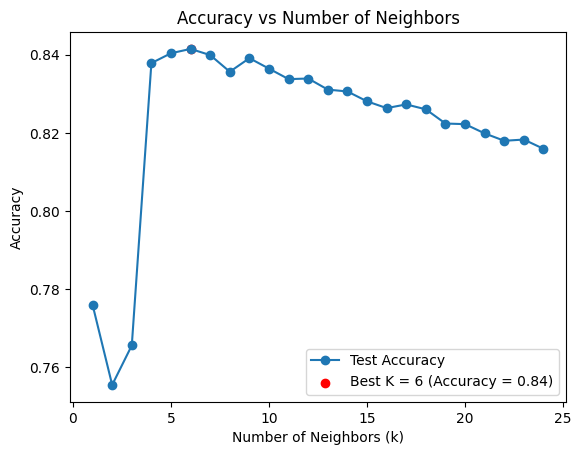

In [ ]:

# Plotting the optimal value of k
plt.plot(ks, test_scores, marker='o', linestyle='-', label='Test Accuracy')
plt.scatter(best_k, best_score, color='red', label=f'Best K = {best_k} (Accuracy = {best_score:.2f})')

# Adding labels and legend
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors')
plt.legend()

# Displaying the plot
plt.show()

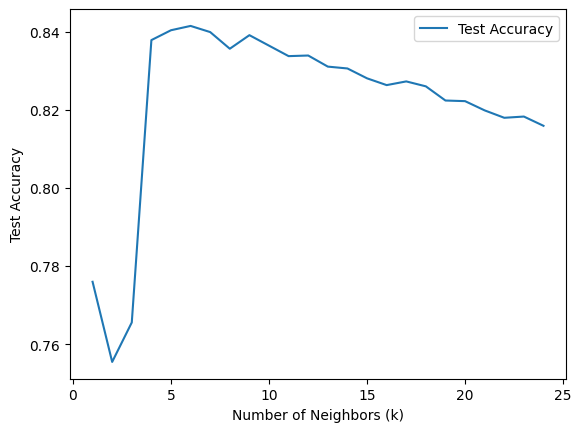

In [ ]:
import matplotlib.pyplot as plt

plt.plot(ks, test_scores, linestyle='-', label='Test Accuracy')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.legend()

plt.show()